In [1]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 29.5 MB/s eta 0:00:00


In [165]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from IPython.display import Image


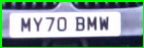

In [166]:
Image("scaned_img_0.jpg")

In [167]:
reader = easyocr.Reader(['en'])

In [168]:
output = reader.readtext('/content/scaned_img_0.jpg')

In [169]:
output

[([[16, 12], [112, 12], [112, 36], [16, 36]], 'HY7O BMW', 0.188936846056334)]

In [170]:
cord = output[-1][0]

In [171]:
cord

[[16, 12], [112, 12], [112, 36], [16, 36]]

In [172]:
a = list(zip(*cord))
a

[(16, 112, 112, 16), (12, 12, 36, 36)]

In [173]:
min(a[0])

16

In [174]:
min(a[1])

12

In [175]:
max(a[0])

112

In [176]:
max(a[1])

36

In [177]:
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]

In [178]:
x_min, y_min

(16, 12)

In [179]:
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]

In [180]:
x_max, y_max

(112, 36)

In [181]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 30

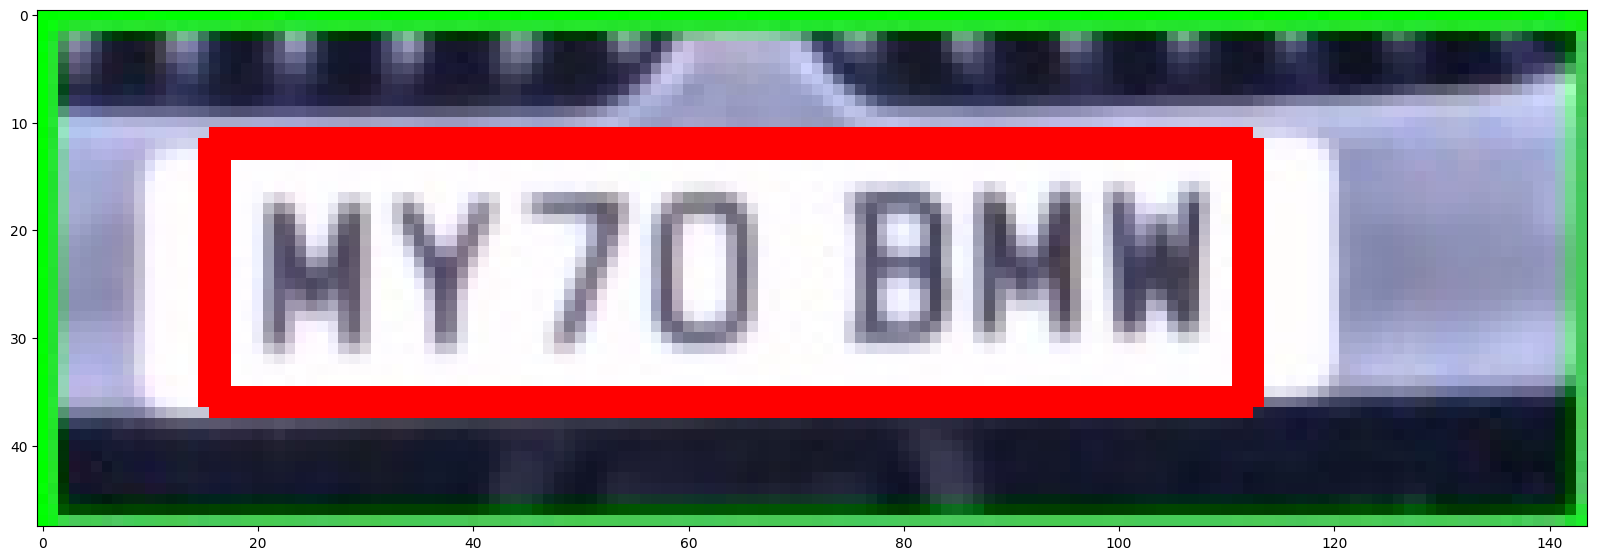

In [182]:
image = cv2.imread('/content/scaned_img_0.jpg')
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [183]:
# import requests to install tesseract

import requests

In [184]:
d = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata", stream=True)

with open("/usr/share/tesseract-ocr/4.00/tessdata/ind.traineddata", "wb") as file:
  for block in d.iter_content(chunk_size=1024):
    if block:
      file.write(block)

In [185]:
# Install libraries for Optical Character Recognition:

! apt install tesseract-ocr libtesseract-dev libmagickwand-dev

# Clearing Unimportant output:

from IPython.display import HTML, clear_output
clear_output()


In [186]:
! pip install pytesseract wand opencv-python
clear_output()

In [187]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

In [188]:
image = cv2.imread('scaned_img_0.jpg')

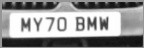

In [189]:
# Greyscale image:

def get_greyscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = get_greyscale(image)
Image.fromarray(gray_image)



cv2.cvtColor() method is used to convert an image from one color space to another.After converting the image to greyscale it become less complex to process the image as it has only two values i.e 0 & 1.

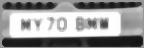

In [190]:
# Remove noise:

def noise_removal(image):
  return cv2.medianBlur(image,5)
noise = noise_removal(gray_image)
Image.fromarray(noise)


we have blur the image to remove the noise. cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value.

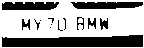

In [191]:
# Thresholding:

def threshold(image):
  return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = threshold(gray_image)
Image.fromarray(thresh)

We have performed the threshold transformation here .If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black).

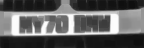

In [192]:
# Erosion:

def erosion(image):
  kernel = np.ones((5,5), np.uint8)
  return cv2.erode(image, kernel, iterations=1)
erode = erosion(gray_image)
Image.fromarray(erode)

cv2.erode() method is used to perform erosion on the image.It is normally performed on binary images.

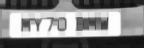

In [193]:
# Morphology:

def morph(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
morphimg = morph(gray_image)
Image.fromarray(morphimg)

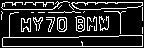

In [194]:
# Canny edge detection:

def canny(image):
    return cv2.Canny(image, 100, 200)
cannyimg = canny(gray_image)
Image.fromarray(cannyimg)

In [195]:
# Template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
match = match_template(gray_image, gray_image)
match

array([[1.]], dtype=float32)

Here we are trying to match the image. As we are passing same image for matching we got the similarity of 99.99%. Here, template matching is a method for searching and finding the location of a template image in a larger image.

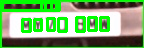

In [196]:
# Drawing rectangle around text
img = cv2.imread('scaned_img_0.jpg')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
Image.fromarray(img)